# Sources of Randomness in APEBench

This tutorial is work in progress

In [1]:
import apebench
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/home/koehler/miniconda3/envs/mkdocs/lib/python3.12/site-packages/trainax/_general_trainer.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [14]:
advection_scenario = apebench.scenarios.difficulty.Advection(
    optim_config="adam;1000;constant;3e-4",
    record_loss_every=1,
)

In [15]:
data_run_0, nets_run_0 = advection_scenario()

E: 00000, B: 00000:   0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
data_run_1, nets_run_1 = advection_scenario()

E: 00000, B: 00000:   0%|          | 0/1000 [00:00<?, ?it/s]

In [17]:
loss_df_1 = apebench.melt_loss(data_run_0)
loss_df_2 = apebench.melt_loss(data_run_1)
loss_df_1["run"] = 0
loss_df_2["run"] = 1
loss_df = pd.concat([loss_df_1, loss_df_2])

(1e-05, 0.0001)

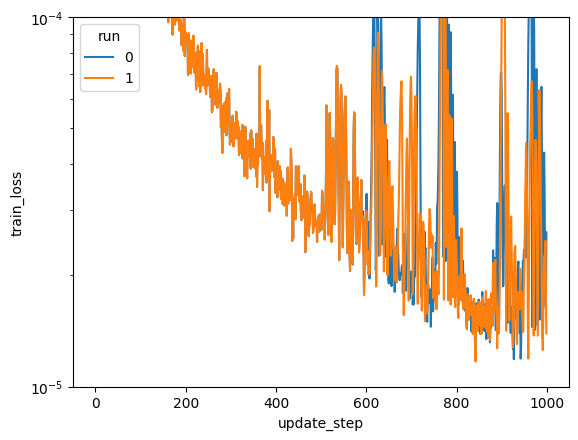

In [19]:
sns.lineplot(data=loss_df, x="update_step", y="train_loss", hue="run")
plt.yscale("log")
plt.ylim(1e-5, 1e-4)

# Activate Determinism

Rerun the notebook but starting with the cells below

In [2]:
import os

os.environ[
    "XLA_FLAGS"
] = "--xla_gpu_deterministic_ops=true"  # --xla_gpu_autotune_level=0"
# os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [3]:
advection_scenario = apebench.scenarios.difficulty.Advection(
    optim_config="adam;1000;constant;3e-4",
    record_loss_every=1,
)

In [4]:
data_run_0_deterministic, nets_run_0_deterministic = advection_scenario()

2024-06-26 14:52:26.711365: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


E: 00000, B: 00000:   0%|          | 0/1000 [00:00<?, ?it/s]

In [5]:
data_run_1_deterministic, nets_run_1_deterministic = advection_scenario()

E: 00000, B: 00000:   0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
loss_df_1_deterministic = apebench.melt_loss(data_run_0_deterministic)
loss_df_2_deterministic = apebench.melt_loss(data_run_1_deterministic)
loss_df_1_deterministic["run"] = 0
loss_df_2_deterministic["run"] = 1
loss_df_deterministic = pd.concat([loss_df_1_deterministic, loss_df_2_deterministic])

(1e-05, 0.0001)

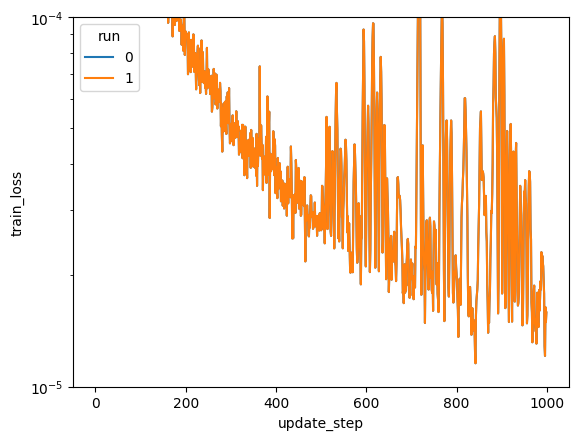

In [7]:
sns.lineplot(data=loss_df_deterministic, x="update_step", y="train_loss", hue="run")
plt.yscale("log")
plt.ylim(1e-5, 1e-4)